# CAPUEE 2019: Data Visualization Using Python

# Part 1/2 : Introduction, matplotlib and plotly

## 0. Introduction
Until now, we have worked with Arduino, Raspberry Pi, APIs, python, with a common objective: Retrieve data for a specific objective. Using data, we can observe how is the behavior of the load we are controlling and we can schedule its operation according to some specific signals, such as light intensity, market prices, time, etc. 

A useful way to see that the load is behaving in the way we want is by using data visualization tools. Data visualization has become a key activity in companies to extract conclusions and define the next steps of the company.

In this session, we will use a wind turbine dataset, using data shared by DTU at the following DOIs: 10.11583/DTU.7856891 and 10.11583/DTU.7856888. We will have historical observations of V52 Wind turbine. We will work with historical observations, using a csv file. 

![V52 Wind Turbine](./images/v52turbine_3.jpg)

We will use different Python libraries to visualize these data. Specifically, the libraries used in this lab session will be matplotlib, plotly and Dash. 

## 1. Data Pre-processing
### 1.1. Importing Libraries



In [3]:
# data processing
import pandas as pd 
# numerical library 
import numpy as np
# timer, dates
import datetime
# data visualization libraries
import matplotlib.pyplot as plt 

### 1.2. Loading Data

In [23]:
df = pd.read_csv('./data/V52_ExtensiveData.csv', sep='\t', skiprows=12)

### 1.3. First look at the dataset

In [24]:
df.head()

,Date,Wsp_44m,Wdir_41m,ActPow,RePow,ActPow_std,Wsp_44m_std,Wdir_41m_std,stability
0,201801010000,4.71803,200.743,64.6673,0.000860,33.4251,0.566131,6.45730,1.0
1,201801010010,5.44100,201.768,70.8152,-0.000657,26.3829,0.765691,6.66940,1.0
2,201801010020,5.32178,197.962,80.8037,-0.000617,30.2002,0.603442,6.99113,1.0
3,201801010030,5.95325,204.606,86.1123,-0.002370,43.1192,0.872915,5.47062,1.0
4,201801010040,6.17765,204.398,110.8570,0.001033,29.9507,0.550160,4.93713,1.0


In [25]:
df.shape

(52241, 9)

In [26]:
df.dtypes

Date              int64
Wsp_44m         float64
Wdir_41m        float64
ActPow          float64
RePow           float64
ActPow_std      float64
Wsp_44m_std     float64
Wdir_41m_std    float64
stability       float64
dtype: object

Questions for you: 

1. Are all the columns in the right format? 
2. Do we have to change any of the types? 
3. Are the columns' name useful for us? What's the information they are trying to tell us? 

### 1.4. Changing columns' type

In [27]:
df['Date'] = pd.to_datetime(df['Date'], format='%Y%m%d%H%M')

In [28]:
df.head()

,Date,Wsp_44m,Wdir_41m,ActPow,RePow,ActPow_std,Wsp_44m_std,Wdir_41m_std,stability
0,2018-01-01 00:00:00,4.71803,200.743,64.6673,0.000860,33.4251,0.566131,6.45730,1.0
1,2018-01-01 00:10:00,5.44100,201.768,70.8152,-0.000657,26.3829,0.765691,6.66940,1.0
2,2018-01-01 00:20:00,5.32178,197.962,80.8037,-0.000617,30.2002,0.603442,6.99113,1.0
3,2018-01-01 00:30:00,5.95325,204.606,86.1123,-0.002370,43.1192,0.872915,5.47062,1.0
4,2018-01-01 00:40:00,6.17765,204.398,110.8570,0.001033,29.9507,0.550160,4.93713,1.0


### 1.5. Exploratory Data Analysis (EDA)

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52241 entries, 0 to 52240
Data columns (total 9 columns):
Date            52241 non-null datetime64[ns]
Wsp_44m         48988 non-null float64
Wdir_41m        48988 non-null float64
ActPow          52103 non-null float64
RePow           52103 non-null float64
ActPow_std      52103 non-null float64
Wsp_44m_std     48988 non-null float64
Wdir_41m_std    48988 non-null float64
stability       52241 non-null float64
dtypes: datetime64[ns](1), float64(8)
memory usage: 3.6 MB


In [30]:
df.describe()

,Wsp_44m,Wdir_41m,ActPow,RePow,ActPow_std,Wsp_44m_std,Wdir_41m_std,stability
count,48988.000000,48988.000000,52103.000000,52103.000000,52103.000000,48988.000000,48988.000000,52241.000000
mean,5.595770,192.776609,139.070329,-0.071636,36.724520,0.823869,8.386558,0.513677
std,2.796707,88.910389,203.275309,0.634039,46.100481,0.520168,4.740973,0.499818
min,0.503833,0.001286,-27.466700,-5.744410,0.000000,0.000000,0.000000,0.000000
25%,3.626872,125.051750,-0.400000,-0.002700,0.701526,0.444232,5.594978,0.000000
50%,5.185345,198.823000,57.400500,-0.000527,21.300500,0.721182,7.402470,1.000000
75%,7.081175,266.270000,175.286000,0.002410,52.089700,1.092800,9.730003,1.000000
max,19.720000,359.997000,867.900000,11.800000,408.458000,4.028130,57.136100,1.000000


## 2. Creating plots using matplotlib

In [31]:
df.head()

,Date,Wsp_44m,Wdir_41m,ActPow,RePow,ActPow_std,Wsp_44m_std,Wdir_41m_std,stability
0,2018-01-01 00:00:00,4.71803,200.743,64.6673,0.000860,33.4251,0.566131,6.45730,1.0
1,2018-01-01 00:10:00,5.44100,201.768,70.8152,-0.000657,26.3829,0.765691,6.66940,1.0
2,2018-01-01 00:20:00,5.32178,197.962,80.8037,-0.000617,30.2002,0.603442,6.99113,1.0
3,2018-01-01 00:30:00,5.95325,204.606,86.1123,-0.002370,43.1192,0.872915,5.47062,1.0
4,2018-01-01 00:40:00,6.17765,204.398,110.8570,0.001033,29.9507,0.550160,4.93713,1.0


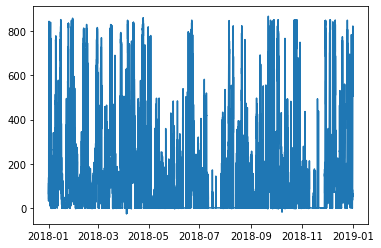

In [39]:
plt.plot(df['Date'], df['ActPow'])
plt.show()

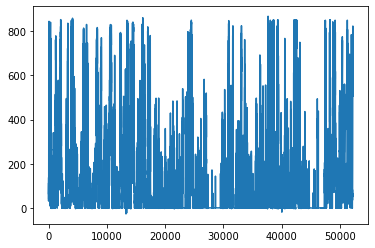

In [40]:
plt.plot(df['ActPow'])
plt.show()

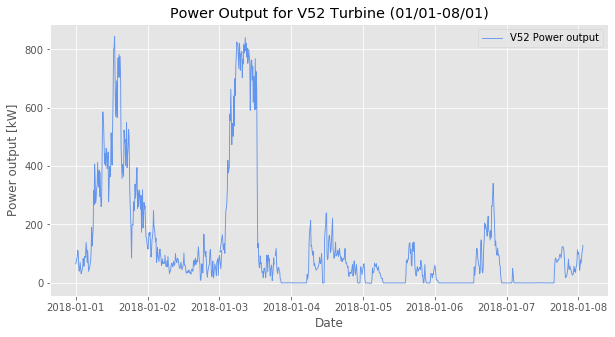

In [60]:
plt.style.use('ggplot')
plt.figure(figsize=(10,5))
plt.plot(df['Date'][0:6*24*7], df['ActPow'][0:6*24*7], linewidth=0.9, color= 'cornflowerblue')
plt.title('Power Output for V52 Turbine (01/01-08/01)')
plt.xlabel('Date')
plt.ylabel('Power output [kW]')
plt.legend(['V52 Power output'])
plt.savefig('./images/V52_Plot.png', dpi=300)
plt.show()

## 3. Interactive data visualization: Plotly

In [63]:
# plotly library for interacive plots
import plotly.offline as py;
from plotly import tools;
import plotly.graph_objs as go;
import warnings;
from ipywidgets import widgets;
from ipywidgets import interact;

warnings.filterwarnings('ignore')
py.init_notebook_mode(connected=True)

In [68]:
fig = go.Figure(
        data=[
           go.Line(x=df['Date'][0:6*24*7],
                   y=df['ActPow'][0:6*24*7], name="V52")
        ],
        layout=go.Layout(
            title=dict(text='Weekly V52 Turbine Power Output'),
            xaxis=dict(title='Date'),
            yaxis=dict(title='Power Output [kW]')
        )
    )
fig.show()

In [65]:
# Creating figure with Plotly
fig = go.Figure()

# Adding first line for active power 
fig.add_trace(go.Line(x=df['Date'][0:6*24*7],
                      y=df['ActPow'][0:6*24*7], name="Active Power"));

# Adding second line for reactive power
fig.add_trace(go.Line(x=df['Date'][0:6*24*7],
                      y=df['RePow'][0:6*24*7], name="Reactive Power", 
                      line = dict(color='lightcoral', width=2, dash='dot')));

# Setting aesthetics for the plot such as Title and axes labels. 
fig.update_layout(
    title=go.layout.Title(text="V52 Wind turbine", xref="paper", x=0, 
                          font=dict(family="Courier New, monospace", size=18, color="#7f7f7f")),
    xaxis=go.layout.XAxis(title=go.layout.xaxis.Title(text="Date", font=dict(family="Courier New, monospace",
                          size=18, color="#7f7f7f"))),
    yaxis=go.layout.YAxis(title=go.layout.yaxis.Title(text="Active Power [kW] Reactive Power [kvar]",
                          font=dict(family="Courier New, monospace", size=18, color="#7f7f7f"))))

fig.show()
